# 0.0 Initial

## 0.1. Import

In [1]:
import pandas  as pd
import numpy   as np
import seaborn as sns

from matplotlib import pyplot          as plt

from IPython.display       import Image

## 0.2. Helper Functions

In [2]:
def bmi (height, weight):
    bmi = weight/((height/100)**2)
    return bmi

## 0.3. Loading Data

In [3]:
df_raw = pd.read_csv('cardio_train.csv', low_memory=False)

In [4]:
df_raw

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1


# 1.0. Data Description

In [5]:
df1 = df_raw.copy()

## 1.1. Data Dimensions

In [6]:
print('Number of columns:', format(df1.shape[1]))
print('Number of rows:', format(df1.shape[0]))

Number of columns: 13
Number of rows: 70000


## 1.2. Data Types

In [7]:
df1.dtypes

id               int64
age              int64
gender           int64
height           int64
weight         float64
ap_hi            int64
ap_lo            int64
cholesterol      int64
gluc             int64
smoke            int64
alco             int64
active           int64
cardio           int64
dtype: object

## 1.3. Check NA

In [8]:
df1.isna().sum()

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

## 1.4. Unit change

In [9]:
#age (int)
df1['age'] = (df1['age']/365).astype(int)

#weight (int)
df1['weight'] = df1['weight'].astype(int)

#plt.subplot(1,3,1)
#sns.boxplot(x='age', data=df1)

## 1.5. Descriptive Statiscal

In [10]:
#central tendency - mean, median
ct1 = pd.DataFrame(df1.apply(np.mean)).T
ct2 = pd.DataFrame(df1.apply(np.median)).T

#Dispersion - std, min, max, range, skew, kurtosis
d1 = pd.DataFrame(df1.apply(min)).T
d2 = pd.DataFrame(df1.apply(max)).T
d3 = pd.DataFrame(df1.apply(lambda x: x.max() - x.min())).T
d4 = pd.DataFrame(df1.apply(np.std)).T
d5 = pd.DataFrame(df1.apply(lambda x: x.skew())).T
d6 = pd.DataFrame(df1.apply(lambda x: x.kurtosis())).T

#concatenate
m = pd.concat([d1,d2,d3,ct1,ct2,d4,d5,d6]).T.reset_index()
m.columns = ['attributes','min','max','range','mean','median','std','skew','kurtosis']
m

,attributes,min,max,range,mean,median,std,skew,kurtosis
0,id,0.0,99999.0,99999.0,49972.419900,50001.5,28851.096242,-0.001278,-1.198374
1,age,29.0,64.0,35.0,52.840671,53.0,6.766725,-0.305744,-0.818981
2,gender,1.0,2.0,1.0,1.349571,1.0,0.476835,0.630960,-1.601935
3,height,55.0,250.0,195.0,164.359229,165.0,8.210068,-0.642187,7.943653
4,weight,10.0,200.0,190.0,74.204329,72.0,14.395850,1.012030,2.586746
5,ap_hi,-150.0,16020.0,16170.0,128.817286,120.0,154.010319,85.296214,7580.074738
6,ap_lo,-70.0,11000.0,11070.0,96.630414,80.0,188.471184,32.114083,1425.914585
7,cholesterol,1.0,3.0,2.0,1.366871,1.0,0.680245,1.587123,0.993901
8,gluc,1.0,3.0,2.0,1.226457,1.0,0.572266,2.397462,4.294377
9,smoke,0.0,1.0,1.0,0.088129,0.0,0.283482,2.905867,6.444250


# 2.0. Feature Engineering

In [11]:
df2 = df1.copy()

**Identification**

Age | Objective Feature | age | int (days)

Height | Objective Feature | height | int (cm) |

Weight | Objective Feature | weight | float (kg) |

Gender | Objective Feature | gender | categorical code | 1 - women | 2 - men



**Review of Systems**

Systolic blood pressure | Examination Feature | ap_hi | int |

Diastolic blood pressure | Examination Feature | ap_lo | int |

Cholesterol | Examination Feature | cholesterol | 1: normal, 2: above normal, 3: well above normal |

Glucose | Examination Feature | gluc | 1: normal, 2: above normal, 3: well above normal |

**Habits**

Smoking | Subjective Feature | smoke | binary |

Alcohol intake | Subjective Feature | alco | binary |

Physical activity | Subjective Feature | active | binary |

**Target Variable**

Presence or absence of cardiovascular disease | Target Variable | cardio | binary |

## 2.1 Mind Map Hypothesis

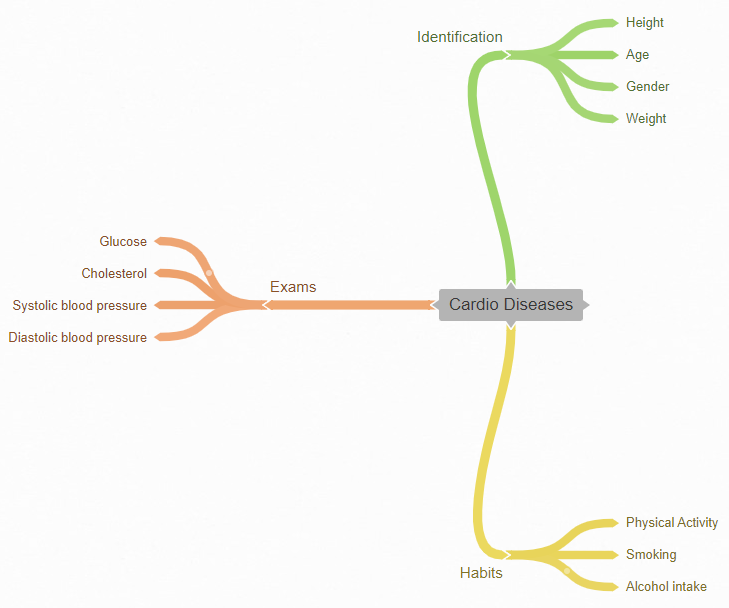

In [12]:
Image('CCD.png')

## 2.2 Hypothesis Creation

### 2.1.1 Identification Hypothesis

**1.** People over 50 are 20% more likely to have CVDs

**2.** People shorter than 170 cm (5'7'') have a 5% chance of CVDs

**3.** Men are 30% more likely than women to develop a CVD

**4.** People over 100 kg (220 lb) have a 40% chance of having a CVD

**5.** People with a BMI above 30 (obese class I) have a 25% chance of having a CVD

### 2.1.2 Habits Hypothesis

**1.** People who do not engage in physical activity are 40% more likely to have CDCs

**2.** People who regularly consume alcohol have a 10% chance of having CVD

**3.** People who smoke are 20% more likely to have CVD

### 2.1.3 Exams Hypothesis

**1.** People who have well above normal cholesterol have a 50% chance of having CVD

**2.** People who have well above normal glucose have a 20% chance of having CVD

**3.** People who have high diastolic blood pressure have a 40% chance of having CVD

**4.** People who have high systolic blood pressure have a 40% chance of having CVD

## 2.3. Final Hypothesis

**1.** People over 50 are 20% more likely to have CVDs

**2.** People shorter than 170 cm (5'7'') have a 5% chance of CVDs

**3.** Men are 30% more likely than women to develop a CVD

**4.** People over 100 kg (220 lb) have a 40% chance of having a CVD

**5.** People with a BMI above 30 (obese class I) have a 25% chance of having a CVD

**6.** People who do not engage in physical activity are 40% more likely to have CVDs

**7.** People who regularly consume alcohol have a 10% chance of having CVD

**8.** People who smoke are 20% more likely to have CVD

**9.** People who have well above normal cholesterol have a 50% chance of having CVD

**10.** People who have well above normal glucose have a 20% chance of having CVD

**11.** People who have high diastolic blood pressure have a 40% chance of having CVD

**12.** People who have high systolic blood pressure have a 40% chance of having CVD

## 2.4. Feature Engineering

In [13]:
#BMI
df2['bmi'] = bmi(df2['height'], df2['weight'])

In [14]:
df2

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi
0,0,50,2,168,62,110,80,1,1,0,0,1,0,21.967120
1,1,55,1,156,85,140,90,3,1,0,0,1,1,34.927679
2,2,51,1,165,64,130,70,3,1,0,0,0,1,23.507805
3,3,48,2,169,82,150,100,1,1,0,0,1,1,28.710479
4,4,47,1,156,56,100,60,1,1,0,0,0,0,23.011177
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,52,2,168,76,120,80,1,1,1,0,1,0,26.927438
69996,99995,61,1,158,126,140,90,2,2,0,0,1,1,50.472681
69997,99996,52,2,183,105,180,90,3,1,0,1,0,1,31.353579
69998,99998,61,1,163,72,135,80,1,2,0,0,0,1,27.099251


# 3.0. Exploratory Data Analysis

In [15]:
df3 = df2.copy()

## 3.1 Univariate Analysis

### 3.1.1 Response variable

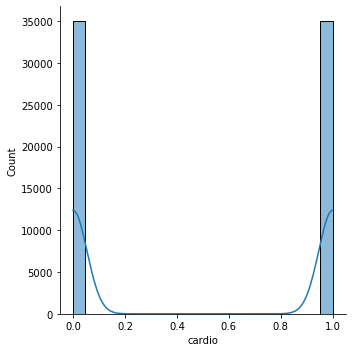

In [16]:
sns.displot(df3['cardio'], kde=True)

### 3.1.2 Numeric variable

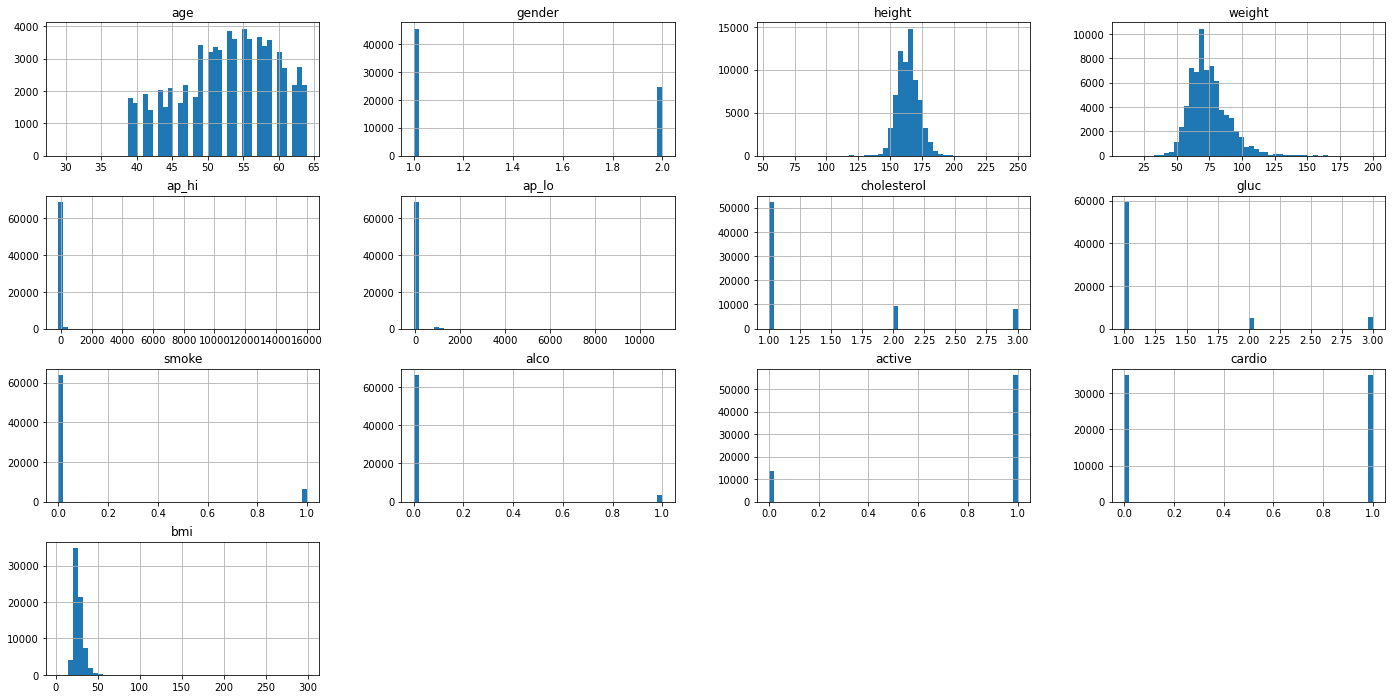

In [17]:
df32 = df3.drop('id', axis=1)
df32.hist(figsize=(24,12), bins=50);

## 3.2. Bivariate Analysis

**1. People over 50 are >20% more likely to have CVDs**

**TRUE** There are 65% more likely to have CVDs

<AxesSubplot:xlabel='age', ylabel='cardio'>

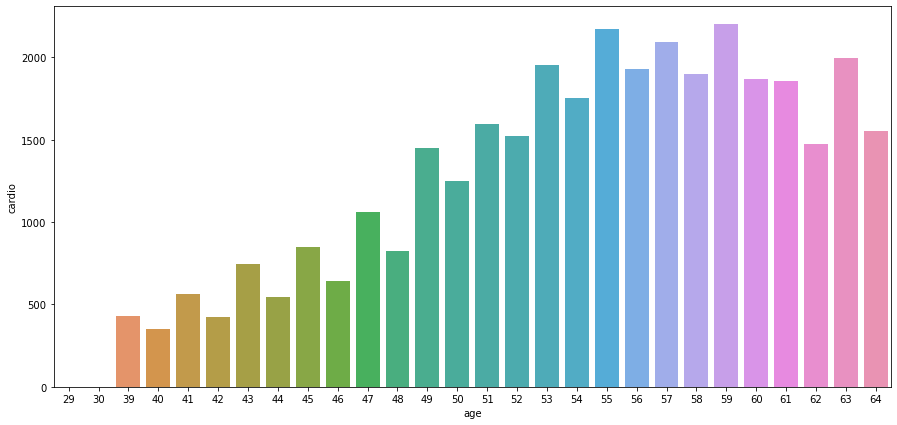

In [18]:
aux1 = df3[['age', 'cardio']].groupby('age').sum().reset_index()

fig_dims = (15, 7)
fig, ax = plt.subplots(figsize=fig_dims)
sns.barplot(x='age', y='cardio', ax=ax, data=aux1)

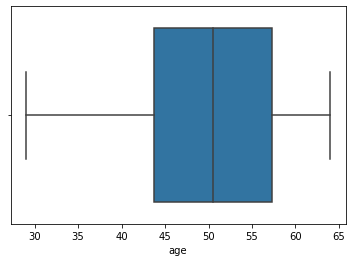

In [19]:
#boxplot age+cardio
sns.boxplot(x='age', data=aux1)
ax.set(xlabel='common xlabel', ylabel='common ylabel')
plt.show()

In [20]:
#older than 50
aux2 = df3[(df3['age'] > 50)]
aux2 = aux2[['age', 'cardio']].groupby('age').sum().reset_index()
aux2.sum()
#sns.barplot(x='age', y='count', data=aux1);

age         805
cardio    25851
dtype: int64

In [21]:
#younger than 50
aux3 = df3[(df3['age'] <= 50)]
aux3 = aux3[['age', 'cardio']].groupby('age').sum().reset_index()
aux3.sum()

age        593
cardio    9128
dtype: int64

**2. People shorter than 170 cm (5'7'') have a 5% chance of CVDs**

**TRUE** There 76% more likely to have a CVD shorter than 170 cm

<AxesSubplot:xlabel='height', ylabel='cardio'>

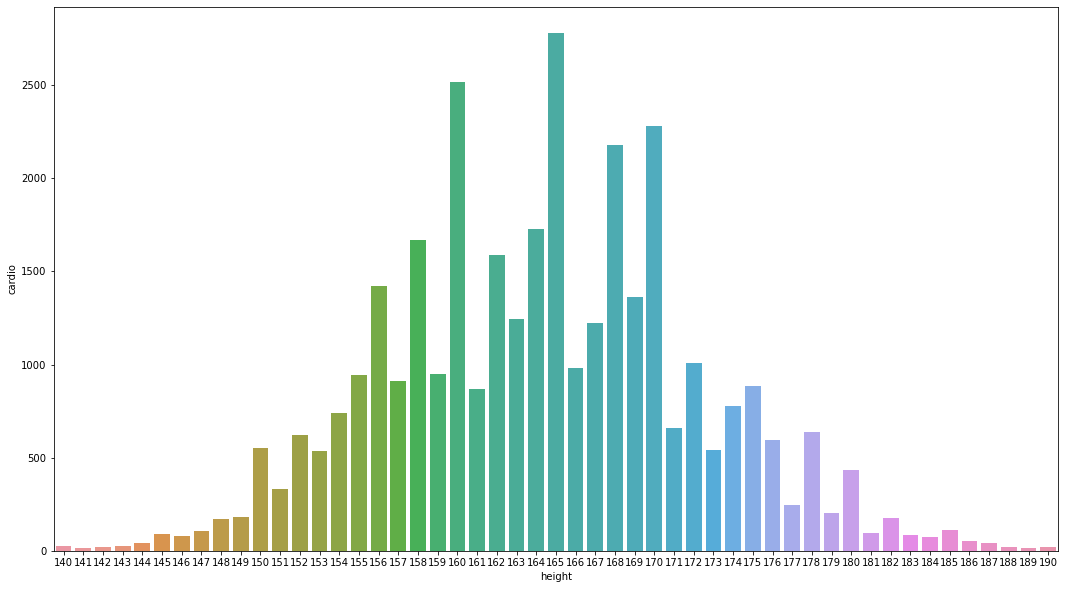

In [22]:
aux1 = df3[(df3['height'] >= 140) & (df3['height'] <= 190)]
aux1 = aux1[['height', 'cardio']].groupby('height').sum().reset_index()

fig_dims = (18, 10)
fig, ax = plt.subplots(figsize=fig_dims)
sns.barplot(x='height', y='cardio', ax=ax, data=aux1)

<AxesSubplot:xlabel='height'>

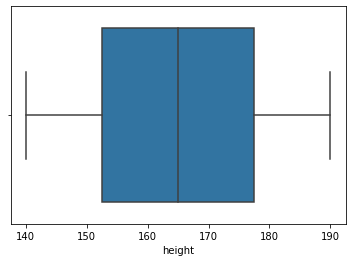

In [23]:
#boxplot height+cardio
aux1 = aux1[['height', 'cardio']].groupby('height').sum().reset_index()
sns.boxplot(x='height', data=aux1)

In [24]:
#shorter than 170cm
aux2 = df3[(df3['height'] < 170)]
aux2 = aux2[['height', 'cardio']].groupby('height').sum().reset_index()
aux2.sum()
#sns.barplot(x='age', y='cardio', data=aux1);

height     9324
cardio    25977
dtype: int64

In [25]:
#taller than 170cm
aux3 = df3[(df3['height'] >= 170)]
aux3 = aux3[['height', 'cardio']].groupby('height').sum().reset_index()
aux3.sum()

height    5993
cardio    9002
dtype: int64

**3. Men are 30% more likely than women to develop a CVD**

**FALSE** Women are 45% more likely than men

In [26]:
aux1 = df3[['gender', 'cardio']].groupby('gender').sum().reset_index()
aux1

,gender,cardio
0,1,22616
1,2,12363


<AxesSubplot:xlabel='gender', ylabel='cardio'>

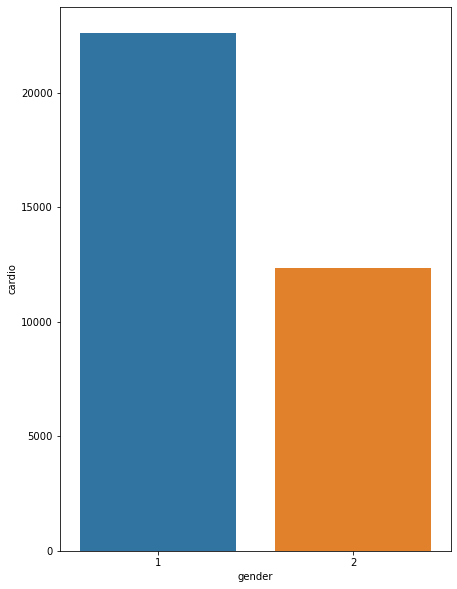

In [27]:
fig_dims = (7, 10)
fig, ax = plt.subplots(figsize=fig_dims)
sns.barplot(x='gender', y='cardio', ax=ax, data=aux1)

**4. People over 100 kg (220 lb) have a 40% chance of having a CVD**

**FALSE** People with less 100 kg have 9% chance of having a CVD

<AxesSubplot:xlabel='weight', ylabel='cardio'>

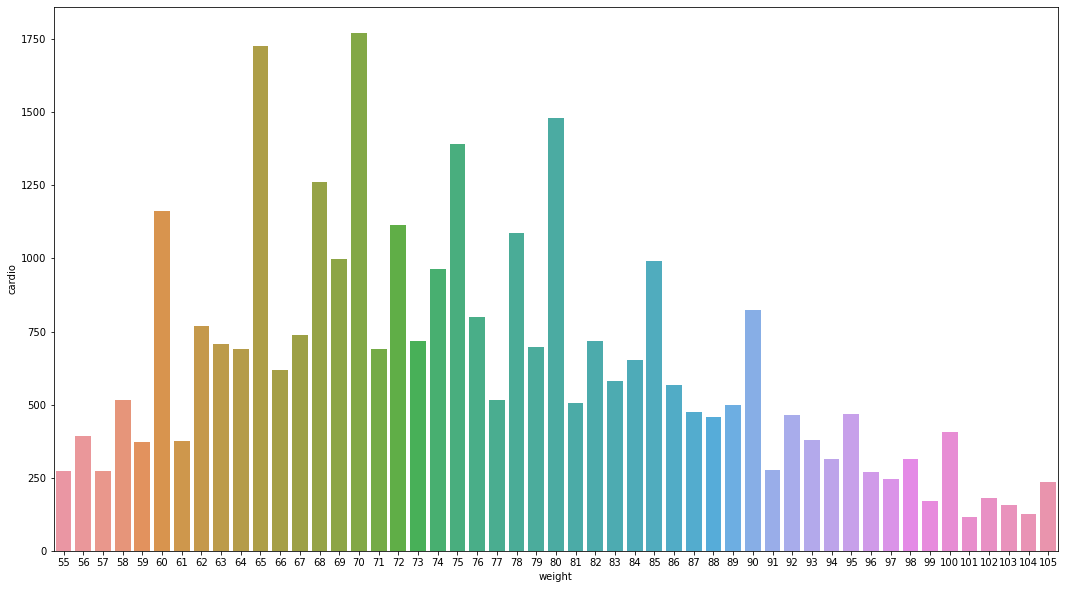

In [28]:
aux1 = df3[(df3['weight'] >= 55) & (df3['weight'] <= 105)]
aux1 = aux1[['weight', 'cardio']].groupby('weight').sum().reset_index()

fig_dims = (18, 10)
fig, ax = plt.subplots(figsize=fig_dims)
sns.barplot(x='weight', y='cardio', ax=ax, data=aux1)

<AxesSubplot:xlabel='weight'>

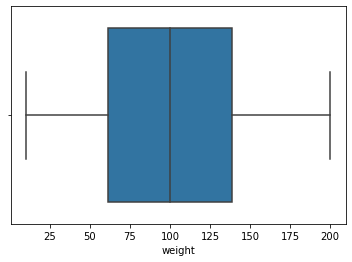

In [29]:
#boxplot weight+cardio
aux1 = df3[['weight', 'cardio']].groupby('weight').sum().reset_index()
sns.boxplot(x='weight', data=aux1)

In [30]:
#more than 100 kg
aux2 = df3[(df3['weight'] > 100)]
aux2 = aux2[['weight', 'cardio']].groupby('weight').sum().reset_index()
aux2.sum()

weight    10794
cardio     2249
dtype: int64

In [31]:
#lesser than 100 kg
aux3 = df3[(df3['weight'] <= 100)]
aux3 = aux3[['weight', 'cardio']].groupby('weight').sum().reset_index()
aux3.sum()

weight     4759
cardio    32730
dtype: int64

**5. People with a BMI above 30 (obese class I) have a 25% chance of having a CVD**

**FALSE** People with a BMI less than 30 have 64% chance of having CVD

In [32]:
#bmi (int)
df3['bmi'] = df3['bmi'].astype(int)

In [46]:
aux1 = df3[(df3['bmi'] >= 15) & (df3['bmi'] <= 50)]
aux1 = aux1[['bmi', 'cardio']].groupby('bmi').sum().reset_index()

fig_dims = (18, 10)
fig, ax = plt.subplots(figsize=fig_dims)
sns.barplot(x='bmi', y='cardio', ax=ax, data=aux1)

,bmi,cardio
0,15,0
1,15,1
2,16,0
3,16,1
4,17,0
...,...,...
67,48,1
68,49,0
69,49,1
70,50,0


<AxesSubplot:xlabel='bmi'>

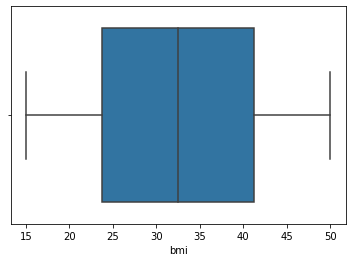

In [38]:
#boxplot bmi+cardio
#aux1 = df3[['bmi', 'cardio']].groupby('bmi').sum().reset_index()
sns.boxplot(x='bmi', data=aux1)

In [49]:
#more than 30
aux2 = df3[(df3['bmi'] > 30)]
aux2 = aux2[['bmi', 'cardio']].groupby('bmi').sum().reset_index()
aux2.sum()

bmi       6498
cardio    9724
dtype: int64

In [41]:
#lesser than 30
aux3 = df3[(df3['bmi'] <= 30)]
aux3 = aux3[['bmi', 'cardio']].groupby('bmi').sum().reset_index()
aux3.sum()

bmi         447
cardio    25255
dtype: int64

**6. People who do not engage in physical activity are 40% more likely to have CVDs**

In [43]:
aux1 = df3[['active', 'cardio']].groupby('active').sum().reset_index()
aux1

,active,cardio
0,0,7361
1,1,27618


**7. People who regularly consume alcohol have a 10% chance of having CVD**

In [50]:
aux1 = df3[['alco', 'cardio']].groupby('alco').sum().reset_index()
aux1

,alco,cardio
0,0,33156
1,1,1823


**8. People who smoke are 20% more likely to have CVD**

In [51]:
aux1 = df3[['smoke', 'cardio']].groupby('smoke').sum().reset_index()
aux1

,smoke,cardio
0,0,32050
1,1,2929


**9. People who have well above normal cholesterol have a 50% chance of having CVD**

In [52]:
aux1 = df3[['cholesterol', 'cardio']].groupby('cholesterol').sum().reset_index()
aux1

,cholesterol,cardio
0,1,23055
1,2,5750
2,3,6174


**10. People who have well above normal glucose have a 20% chance of having CVD**

In [53]:
aux1 = df3[['gluc', 'cardio']].groupby('gluc').sum().reset_index()
aux1

,gluc,cardio
0,1,28585
1,2,3078
2,3,3316


**11. People who have high diastolic blood pressure have a 40% chance of having CVD**

In [54]:
aux1 = df3[['ap_lo', 'cardio']].groupby('ap_lo').sum().reset_index()
aux1

,ap_lo,cardio
0,-70,1
1,0,6
2,1,0
3,6,0
4,7,0
...,...,...
152,9011,2
153,9100,1
154,9800,0
155,10000,3


**12. People who have high systolic blood pressure have a 40% chance of having CVD**

In [56]:
aux1 = df3[['ap_hi', 'cardio']].groupby('ap_hi').sum().reset_index()
aux1

,ap_hi,cardio
0,-150,1
1,-140,1
2,-120,1
3,-115,0
4,-100,0
...,...,...
148,11020,1
149,11500,1
150,13010,1
151,14020,3
